In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'flgh2o',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'planck_wgt_flux',
            'option_wgt',
            'fac_meank',
            'klin']


def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'co2',
                          'band03c_wn_720_800',
                          'ng_9',
                          'g_descending',
                          'refPTs_P_1_T_250__P_10_T_250__P_500_T_250',
                          'ng_refs_3__2__4',
                          'getabsth_auto__auto__semiauto',
                          'absth_dlogN_uniform__dlogN_uniform__dlogN_uniform',
                          'wgt_.6_.4_.7___.7_.5__.3_.4_.85_.95',
                          'bigsum',
                          'option_wgt_1',
                          'chou_0501_-_manual_abscom2_-_151f63b',
                          'atmpro_saw')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'co2',
                          'band03c_wn_720_800',
                          'ng_9',
                          'g_descending',
                          'refPTs_P_1_T_250__P_10_T_250__P_500_T_250',
                          'ng_refs_3__2__4',
                          'getabsth_auto__auto__semiauto',
                          'absth_dlogN_uniform__dlogN_uniform__dlogN_uniform',
                          'wgt_.6_.4_.7___.7_.5__.3_.4_.85_.95',
                          'bigsum',
                          'option_wgt_1',
                          'chou_0501_-_manual_abscom2_-_151f63b',
                          'atmpro_saw')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1', vartypes=['cooling rate'])
fig.ggroups = list(range(1, 9 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 720

nband = 80

nv = 200

dv = 0.005

tsfc = 257.0

ng = 9

nref = 3

p_refs = (/ 1,  10, 500 /)

t_refs = (/ 250, 250, 250 /)

ng_refs = (/ 3,   2,   4 /)

data wgt
     &     /.95, .85, .4, .3,
     &     .5, .7,
     &     .7, .4, .6/

planck_wgt_flux = 2

option_wgt = 1

klin = 6.375563e-24

include 'saw75.pro'


In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [14]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [15]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [16]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: cooling rate g-group 1

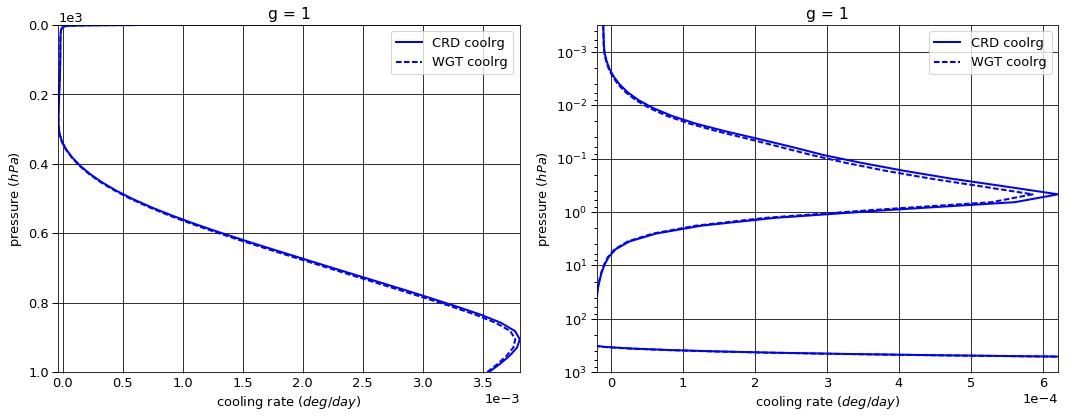

# Figure: cooling rate g-group 2

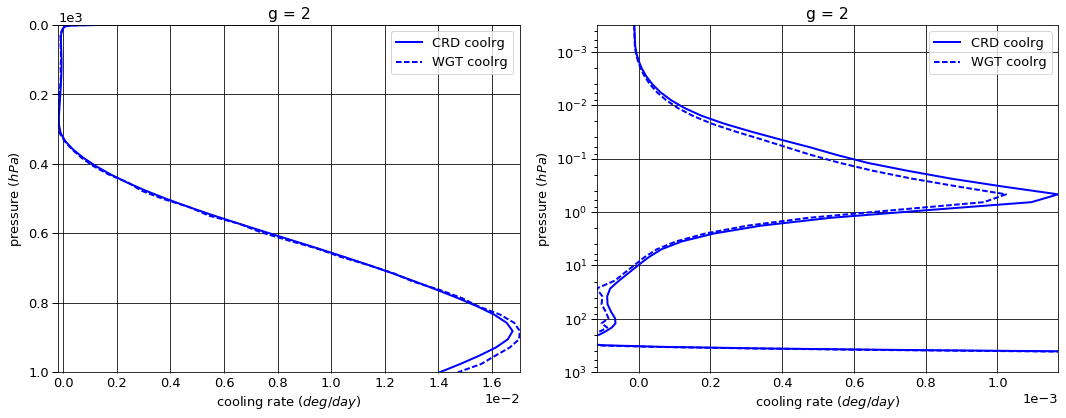

# Figure: cooling rate g-group 3

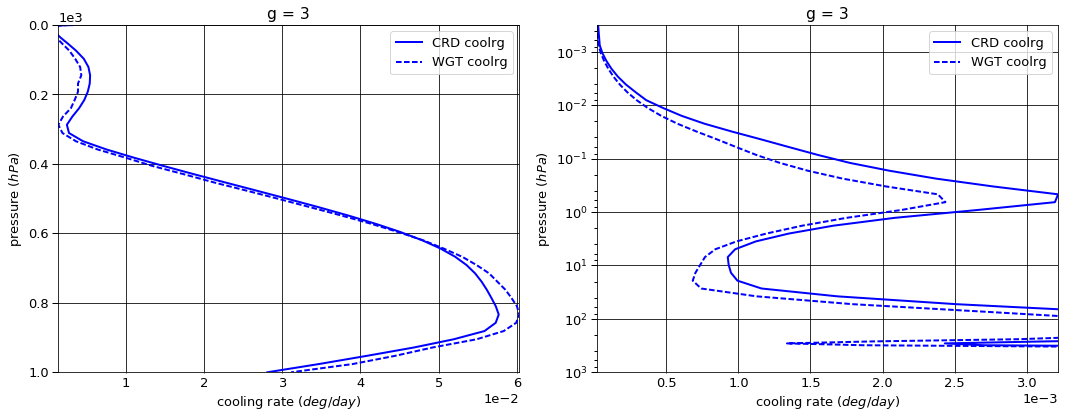

# Figure: cooling rate g-group 4

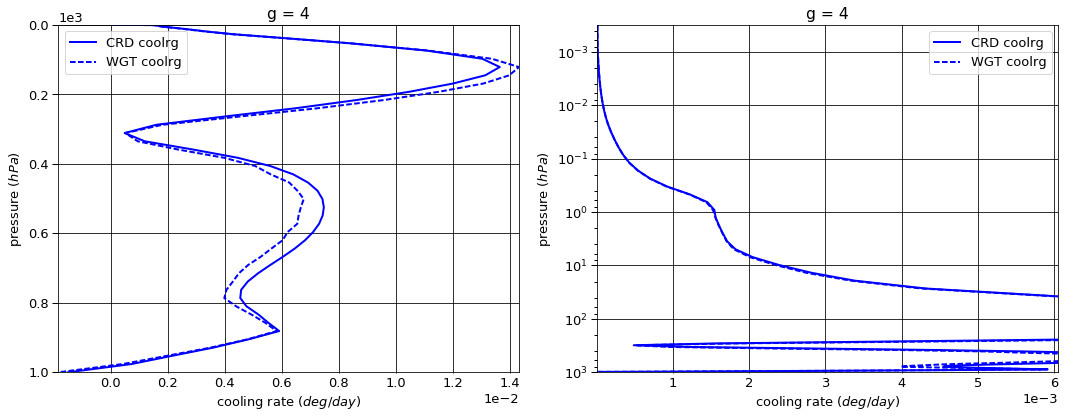

# Figure: cooling rate g-group 5

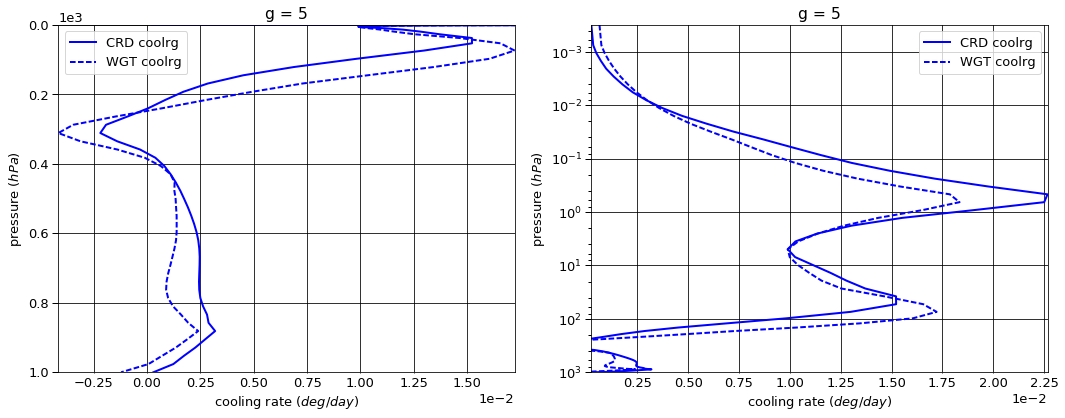

# Figure: cooling rate g-group 6

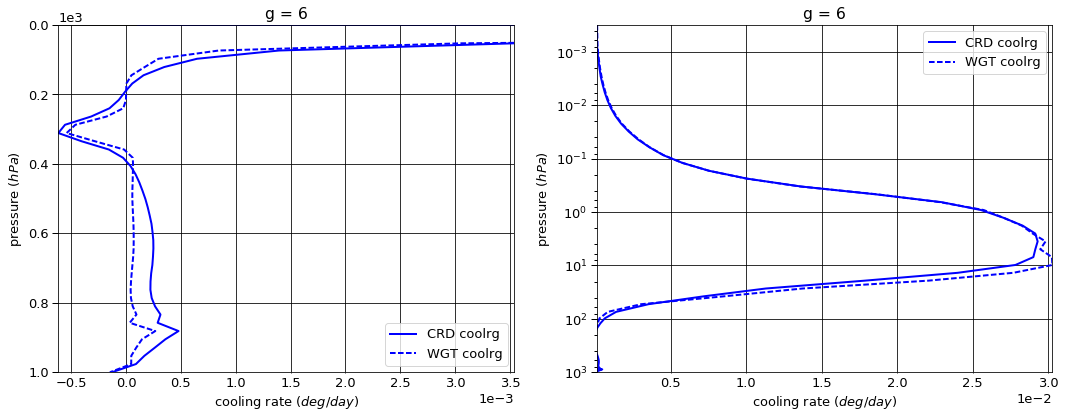

# Figure: cooling rate g-group 7

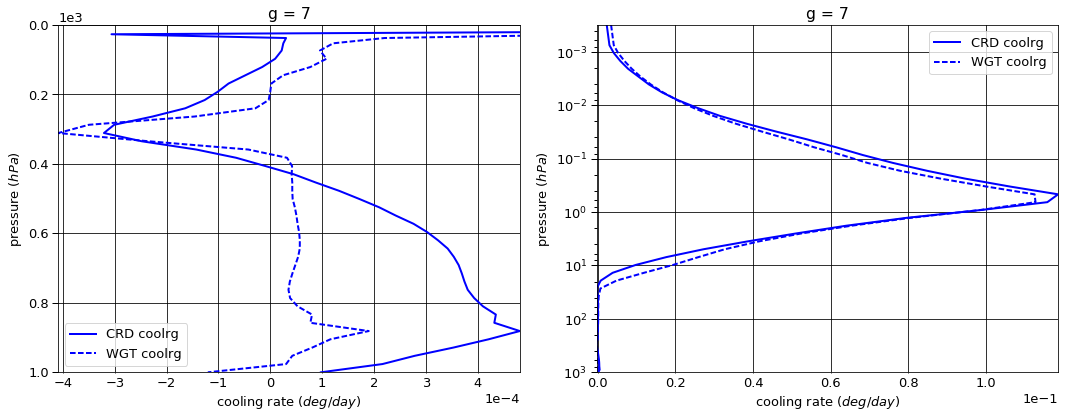

# Figure: cooling rate g-group 8

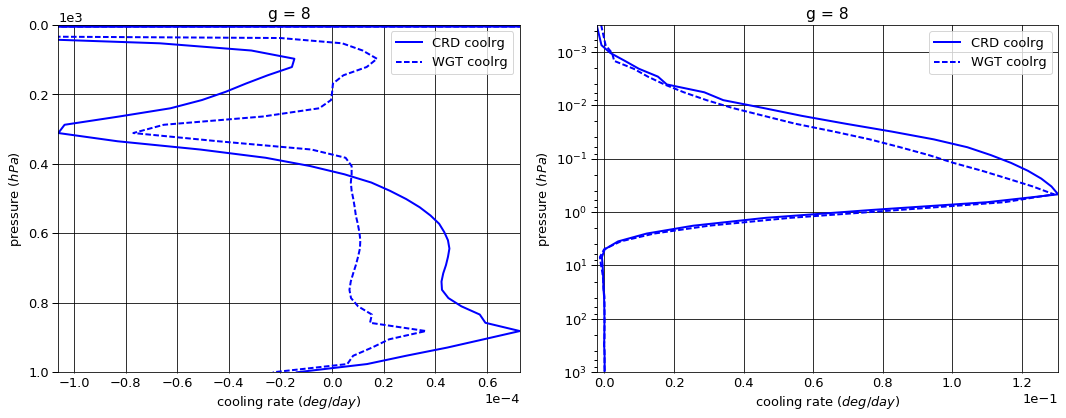

# Figure: cooling rate g-group 9

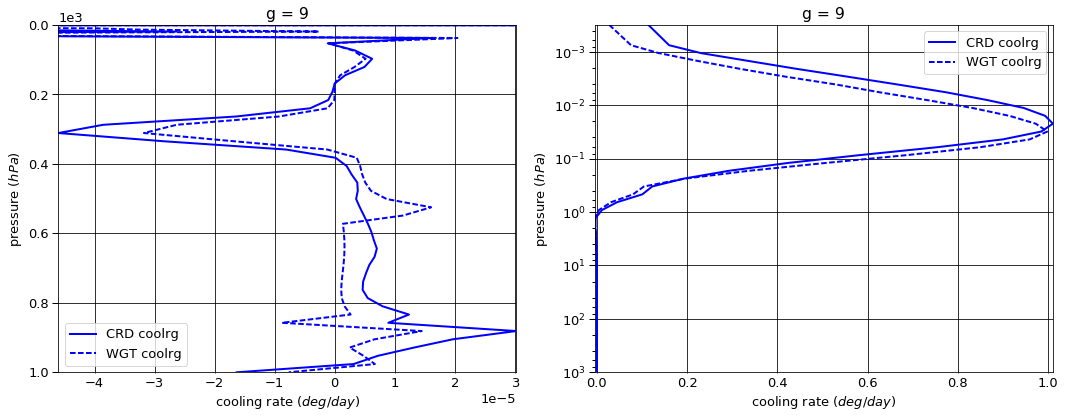

# Figure: cooling rate g-group total

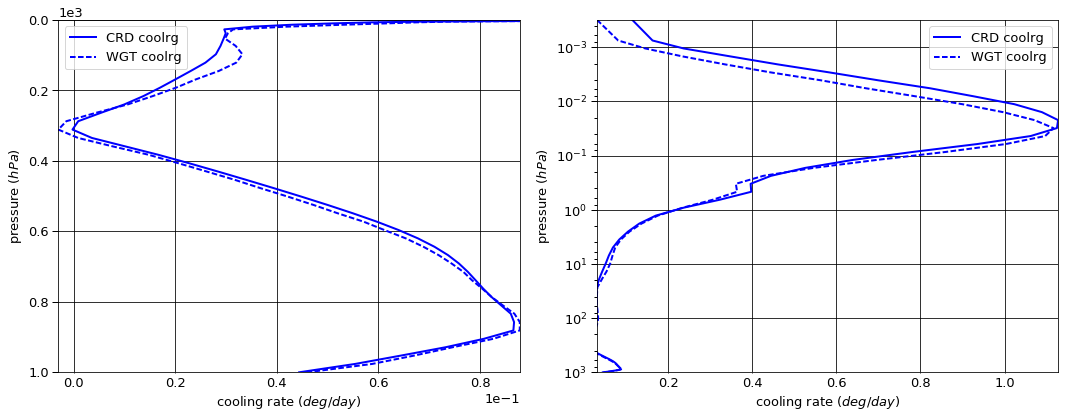

In [17]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [18]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg     fnetg
g pressure level                              
1 0.0      1     -6.709777  0.000000 -6.709777
  1013.0   76    -6.727693  0.177215 -6.550478
2 0.0      1     -3.885526  0.000000 -3.885526
  1013.0   76    -4.013059  0.895213 -3.117847
3 0.0      1     -4.493899  0.000000 -4.493899
  1013.0   76    -5.681881  4.581409 -1.100472
4 0.0      1     -0.704505  0.000000 -0.704505
  1013.0   76    -1.340938  1.354253  0.013315
5 0.0      1     -0.411620  0.000000 -0.411620
  1013.0   76    -0.754792  0.692476 -0.062316
6 0.0      1     -0.111245  0.000000 -0.111245
  1013.0   76    -0.236245  0.235542 -0.000702
7 0.0      1     -0.074702  0.000000 -0.074702
  1013.0   76    -0.121150  0.110694 -0.010456
8 0.0      1     -0.018365  0.000000 -0.018365
  1013.0   76    -0.023303  0.023271 -0.000031
9 0.0      1     -0.018786  0.000000 -0.018786
  1013.0   76    -0.022462  0.022537  0.000075


WGT


flug      fldg     fnetg
g pressure level                              
1 0.0      1     -6.709993  0.000000 -6.709993
  1013.0   76    -6.727693  0.174808 -6.552886
2 0.0      1     -3.887035  0.000000 -3.887035
  1013.0   76    -4.013059  0.900505 -3.112554
3 0.0      1     -4.512004  0.000000 -4.512004
  1013.0   76    -5.681881  4.597277 -1.084604
4 0.0      1     -0.676318  0.000000 -0.676318
  1013.0   76    -1.340938  1.357967  0.017029
5 0.0      1     -0.343318  0.000000 -0.343318
  1013.0   76    -0.754792  0.762198  0.007406
6 0.0      1     -0.108476  0.000000 -0.108476
  1013.0   76    -0.236245  0.236763  0.000519
7 0.0      1     -0.065484  0.000000 -0.065484
  1013.0   76    -0.121150  0.121596  0.000447
8 0.0      1     -0.018612  0.000000 -0.018612
  1013.0   76    -0.023303  0.023388  0.000085
9 0.0      1     -0.018767  0.000000 -0.018767
  1013.0   76    -0.022462  0.022491  0.000029


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0.0      1     -0.000216  0.000000 -0.000216
  1013.0   76     0.000000 -0.002408 -0.002408
2 0.0      1     -0.001510  0.000000 -0.001510
  1013.0   76     0.000000  0.005293  0.005293
3 0.0      1     -0.018105  0.000000 -0.018105
  1013.0   76     0.000000  0.015868  0.015868
4 0.0      1      0.028187  0.000000  0.028187
  1013.0   76     0.000000  0.003714  0.003714
5 0.0      1      0.068302  0.000000  0.068302
  1013.0   76     0.000000  0.069722  0.069722
6 0.0      1      0.002768  0.000000  0.002768
  1013.0   76     0.000000  0.001221  0.001221
7 0.0      1      0.009218  0.000000  0.009218
  1013.0   76     0.000000  0.010903  0.010903
8 0.0      1     -0.000247  0.000000 -0.000247
  1013.0   76     0.000000  0.000116  0.000116
9 0.0      1      0.000019  0.000000  0.000019
  1013.0   76     0.000000 -0.000045 -0.000045

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000011
  1001.112500 75     0.003550
2 0.000312    1     -0.000012
  1001.112500 75     0.014043
3 0.000312    1      0.000027
  1001.112500 75     0.028071
4 0.000312    1      0.000010
  1001.112500 75    -0.001499
5 0.000312    1      0.000239
  1001.112500 75     0.000300
6 0.000312    1      0.000110
  1001.112500 75    -0.000130
7 0.000312    1      0.002299
  1001.112500 75     0.000098
8 0.000312    1     -0.002257
  1001.112500 75    -0.000014
9 0.000312    1      0.114054
  1001.112500 75    -0.000016


WGT


coolrg
g pressure    layer          
1 0.000312    1     -0.000011
  1001.112500 75     0.003536
2 0.000312    1     -0.000013
  1001.112500 75     0.014725
3 0.000312    1      0.000020
  1001.112500 75     0.031119
4 0.000312    1      0.000011
  1001.112500 75    -0.001840
5 0.000312    1      0.000640
  1001.112500 75    -0.001211
6 0.000312    1      0.000138
  1001.112500 75    -0.000148
7 0.000312    1      0.003416
  1001.112500 75    -0.000120
8 0.000312    1     -0.000970
  1001.112500 75    -0.000023
9 0.000312    1      0.027365
  1001.112500 75    -0.000008


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1     -1.943280e-07
  1001.112500 75    -1.351970e-05
2 0.000312    1     -5.532820e-07
  1001.112500 75     6.819780e-04
3 0.000312    1     -6.606309e-06
  1001.112500 75     3.048171e-03
4 0.000312    1      1.024420e-06
  1001.112500 75    -3.409580e-04
5 0.000312    1      4.012329e-04
  1001.112500 75    -1.511338e-03
6 0.000312    1      2.793628e-05
  1001.112500 75    -1.798689e-05
7 0.000312    1      1.117493e-03
  1001.112500 75    -2.181651e-04
8 0.000312    1      1.286713e-03
  1001.112500 75    -9.258645e-06
9 0.000312    1     -8.668835e-02
  1001.112500 75     8.680987e-06

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-16.428425,0.000000,-16.428425
1013.0,76,-18.921523,8.092609,-10.828914



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-16.340007,0.000000,-16.340007
1013.0,76,-18.921523,8.196994,-10.724529



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,0.088417,0.000000,0.088417
1013.0,76,0.000000,0.104384,0.104384


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.114458
1001.112500,75,0.044403



WGT


,,coolrg
pressure,layer,
0.000312,1,0.030597
1001.112500,75,0.046030



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.083861
1001.112500,75,0.001628


In [19]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.369312,0.354380
2,0.213688,0.211927
3,0.290187,0.301164
4,0.067937,0.071126
5,0.038500,0.040013
6,0.011875,0.012540
7,0.006188,0.006422
8,0.001187,0.001235
9,0.001125,0.001193


In [20]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,2.959058e-25
2,6.378566e-24
3,6.102842e-23
4,5.839038e-22
5,1.581825e-22
6,1.678020e-21
7,1.826139e-21
8,1.947095e-20
9,2.076063e-19


In [21]:
def spreadsheet():
    ng = 9
    ng_refs = [3, 2, 4]
    p_refs = [1, 10, 500]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom / df_abscom_copy
    df_absratio.columns = ['k(ig) / k(ig - 1)']
    df_absratio = df_absratio.loc[: ng]
    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref[::-1], 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [22]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig) / k(ig - 1),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,2.959058e-25,NaN,0.369312,0.354380,0.369312,0.354380,500.0
2,6.378566e-24,21.556067,0.213688,0.211927,0.583000,0.566307,500.0
3,6.102842e-23,9.567734,0.290187,0.301164,0.873188,0.867471,500.0
4,5.839038e-22,9.567735,0.067937,0.071126,0.941125,0.938597,500.0
5,1.581825e-22,0.270905,0.038500,0.040013,0.979625,0.978610,10.0
6,1.678020e-21,10.608128,0.011875,0.012540,0.991500,0.991150,10.0
7,1.826139e-21,1.088270,0.006188,0.006422,0.997687,0.997572,1.0
8,1.947095e-20,10.662360,0.001187,0.001235,0.998875,0.998807,1.0
9,2.076063e-19,10.662360,0.001125,0.001193,1.000000,1.000000,1.0


In [23]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

# `absmean`-to-`absmeanlog` Ratio

In [24]:
pd.set_option('display.max_rows', None)
display.display(
    pd.read_csv(os.path.join(crd.rundir, 'absmean.dat'), 
                index_col=[0, 1],
                sep=r'\s+')
    )
pd.reset_option('display.max_rows')

pressure       absmean    absmeanlog      ratio
layer g                                                    
1     1     0.000312  5.245647e-26  6.564803e-27   7.990563
      2     0.000312  1.687500e-25  7.018410e-26   2.404391
      3     0.000312  3.483701e-25  2.798781e-25   1.244721
      4     0.000312  1.817835e-25  1.799667e-25   1.010095
      5     0.000312  2.178218e-23  1.188558e-23   1.832655
      6     0.000312  1.266240e-23  1.197252e-23   1.057622
      7     0.000312  1.037521e-21  6.851709e-22   1.514252
      8     0.000312  1.617650e-20  9.302846e-21   1.738876
      9     0.000312  5.662447e-19  3.164199e-19   1.789536
2     1     0.000750  5.661040e-26  6.795292e-27   8.330827
      2     0.000750  1.812684e-25  7.313542e-26   2.478531
      3     0.000750  3.699226e-25  2.943750e-25   1.256638
      4     0.000750  1.946903e-25  1.926606e-25   1.010535
      5     0.000750  2.298732e-23  1.233015e-23   1.864317
      6     0.000750  1.357251e-23  1.281217e-23   1.059345
      7     0.000750  1.087781e-21  7.094241e-22   1.533329
      8     0.000750  1.681145e-20  9.663689e-21   1.739651
      9     0.000750  5.793442e-19  3.225460e-19   1.796160
3     1     0.001052  6.599738e-26  7.279973e-27   9.065607
      2     0.001052  2.093158e-25  7.923558e-26   2.641689
      3     0.001052  4.172328e-25  3.252133e-25   1.282951
      4     0.001052  2.216870e-25  2.191490e-25   1.011582
      5     0.001052  2.561692e-23  1.323799e-23   1.935107
      6     0.001052  1.539212e-23  1.446506e-23   1.064090
      7     0.001052  1.195684e-21  7.587050e-22   1.575953
      8     0.001052  1.816283e-20  1.042238e-20   1.742676
      9     0.001052  6.064241e-19  3.352392e-19   1.808929
4     1     0.001476  7.703948e-26  7.801936e-27   9.874406
      2     0.001476  2.419998e-25  8.566435e-26   2.824976
      3     0.001476  4.712000e-25  3.589933e-25   1.312559
      4     0.001476  2.529995e-25  2.498185e-25   1.012733
      5     0.001476  2.859415e-23  1.418929e-23   2.015192
      6     0.001476  1.750093e-23  1.636577e-23   1.069362
      7     0.001476  1.315224e-21  8.101728e-22   1.623387
      8     0.001476  1.963604e-20  1.123912e-20   1.747115
      9     0.001476  6.346425e-19  3.485558e-19   1.820777
5     1     0.002070  8.986452e-26  8.357233e-27  10.752904
      2     0.002070  2.796158e-25  9.236437e-26   3.027313
      3     0.002070  5.320438e-25  3.954472e-25   1.345423
      4     0.002070  2.890120e-25  2.850265e-25   1.013983
      5     0.002070  3.192533e-23  1.516997e-23   2.104509
      6     0.002070  1.992736e-23  1.853523e-23   1.075108
      7     0.002070  1.445994e-21  8.631432e-22   1.675265
      8     0.002070  2.122177e-20  1.210571e-20   1.753038
      9     0.002070  6.636534e-19  3.623544e-19   1.831504
6     1     0.002904  1.047433e-25  8.948066e-27  11.705697
      2     0.002904  3.228746e-25  9.937347e-26   3.249102
      3     0.002904  6.006519e-25  4.346872e-25   1.381802
      4     0.002904  3.305843e-25  3.255916e-25   1.015334
      5     0.002904  3.565263e-23  1.617820e-23   2.203745
      6     0.002904  2.273371e-23  2.102420e-23   1.081311
      7     0.002904  1.588960e-21  9.175990e-22   1.731650
      8     0.002904  2.292752e-20  1.302302e-20   1.760538
      9     0.002904  6.934445e-19  3.766500e-19   1.841084
7     1     0.004074  1.219682e-25  9.576466e-27  12.736243
      2     0.004074  3.725351e-25  1.067491e-25   3.489820
      3     0.004074  6.779489e-25  4.768030e-25   1.421864
      4     0.004074  3.787481e-25  3.724948e-25   1.016788
      5     0.004074  3.981821e-23  1.721311e-23   2.313249
      6     0.004074  2.599735e-23  2.389662e-23   1.087909
      7     0.004074  1.744952e-21  9.735533e-22   1.792354
      8     0.004074  2.475795e-20  1.399054e-20   1.769621
      9     0.004074  7.239002e-19  3.914211e-19   1.849415
8     1     0.005714  1.418646e-25  1.024497e-26  13.847252
      2     0.005714  4.294428e-25  1.145775e-25   3

# Histogram of wavenumbers in g-group 1

In [25]:
#pd.read_csv(os.path.join(crd.rundir, 'ig1.dat')).hist()

In [26]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')